In [34]:
import numpy as np
from scipy import linalg
from scipy.optimize import root

import matplotlib as mpl
from matplotlib import pyplot as plt

# font defaults for matplotlib
font = {'size'   : 18}
mpl.rc('font', **font)

In [105]:
c = 0.1
def f(u,t):
    return (u**2 - 1)*(u**2 - 4) + t*(u**2)*np.exp(c*u)

def Df(u,t):
    return np.array( [[ 4*(u**3) -10*u + t*u*np.exp(c*u)*(2+c*u), (u**2)*np.exp(c*u) ]])

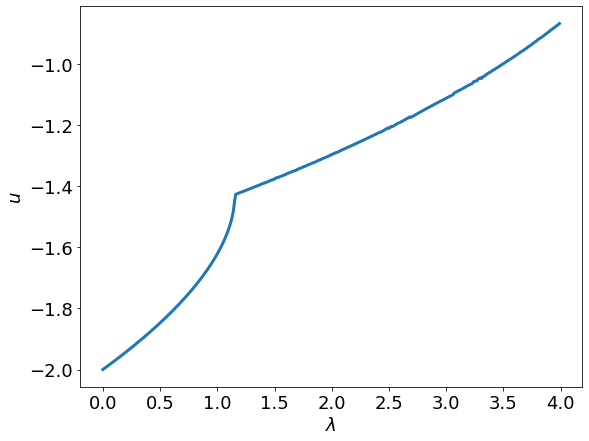

In [89]:
# naive method (old solution is new guess)

u0 = -2
t0 = 0
t1 = 4
h = 0.01

trange = np.arange(t0,t1,h)
u     = np.zeros(trange.shape)
fvals = np.zeros(trange.shape)

for n, t in enumerate(trange):
    sol = root( lambda u : f(u,t), u0 )
    u[n] = sol.x
    fvals[n] = sol.fun
    
plt.figure(figsize=(9,7))
plt.plot(trange,u,linewidth=3)
plt.xlabel('$\lambda$');
plt.ylabel('$u$');

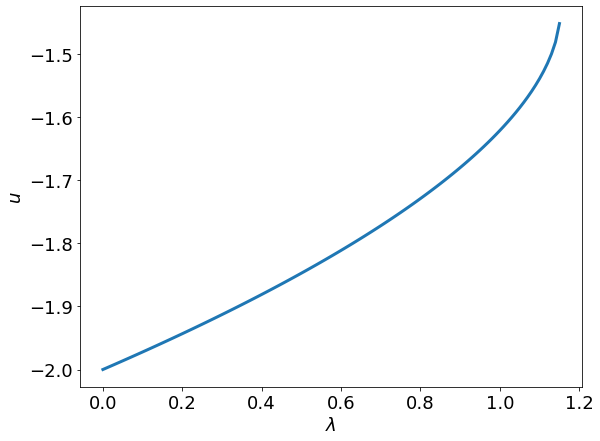

In [90]:
# naive method (old solution is new guess)
# only plot if successful

u0 = -2
t0 = 0
t1 = 4
h = 0.01

trange = np.arange(t0,t1,h)
u     = np.zeros(trange.shape)
fvals = np.zeros(trange.shape)
success = np.zeros(trange.shape)

for n, t in enumerate(trange):
    sol = root( lambda u : f(u,t), u0 )
    u[n] = sol.x
    fvals[n] = sol.fun
    success[n] = sol.success
    
    
plt.figure(figsize=(9,7))
plt.plot(trange[success==True], u[success==True], linewidth=3)
plt.xlabel('$\lambda$');
plt.ylabel('$u$');

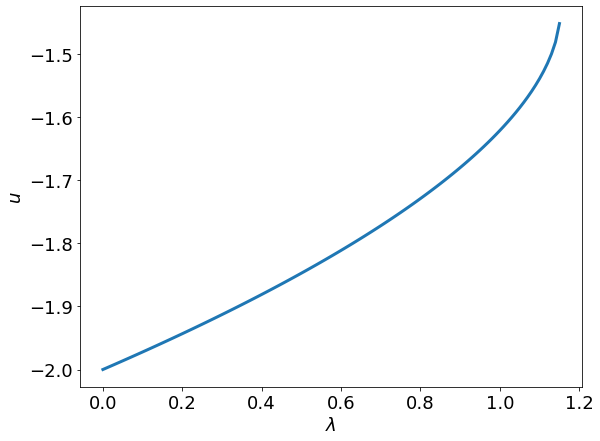

In [91]:
# continuation in parameter (using IFT derivative)

u0 = -2
t0 = 0
t1 = 4
h = 0.01
steps = 200
threshold = 1e-3

t = np.array([t0])
u = np.array([u0])
utilde = np.array([u0])

for n in range(steps):
    D = Df(u[-1],t[-1])
    if np.abs(D[0]) < threshold:
        break
    uprime = -D[1]/D[0]
    utilde = np.append(utilde, u[-1]+h*uprime)
    t0 = t[-1]+h
    sol = root( lambda u : f(u,t0), utilde[-1] )
    if sol.success:
        t = np.append(t,t0)
        u = np.append(u,sol.x)
    else:
        break    
        
plt.figure(figsize=(9,7))
plt.plot(t, u, linewidth=3)
plt.xlabel('$\lambda$');
plt.ylabel('$u$');

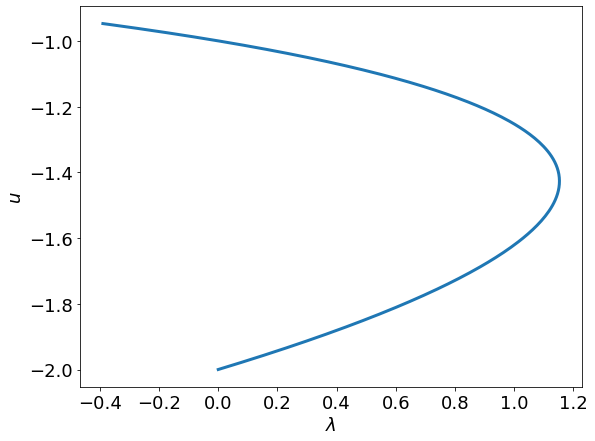

In [192]:
# pseudo-arclength method
def PseudoArclength(U, U0, V1, h):
    F = np.array( [  f( U[0], U[1] ), np.dot((U-U0),V1) - h ] )
    J = np.stack( ( Df( U[0], U[1])[0,:], V1 ) )
    return F, J
    
u0 = -2
t0 = 0
t1 = 3
h = 0.01
steps = 300

t = np.array([t0])
u = np.array([u0])
V0 = linalg.null_space( Df(u[0], t[0]))[:,0]

for n in range(steps):
    U0 = np.array( [u[-1], t[-1] ] )
    V1 = linalg.null_space( Df(u[-1], t[-1]))[:,0]
    if np.dot(V0,V1) < 0:
        V1 = -V1
    sol = root( lambda U : PseudoArclength(U, U0, V1, h)[0], U0+h*V1 )
    u = np.append( u, sol.x[0] )
    t = np.append( t, sol.x[1] )
    V0 = V1

plt.figure(figsize=(9,7))
plt.plot(t, u, linewidth=3)
plt.xlabel('$\lambda$');
plt.ylabel('$u$');

## 